In [1]:
from script import Processing, Visualisation, Modelling

pro = Processing("../data/cardio.csv")
df = pro.df
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
pro.add_bmi()
df = pro.df
df.head()

,age,gender,height,weight,bmi,bmi_cat,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,22.0,normal,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,34.9,obese cl1,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,23.5,normal,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,28.7,overweight,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,23.0,normal,100,60,1,1,0,0,0,0


In [ ]:
pro.add_blood_pressure()
df = pro.df
df.head()

ValueError: Could not interpret value `ap_cat` for `x`. An entry with this name does not appear in `data`.

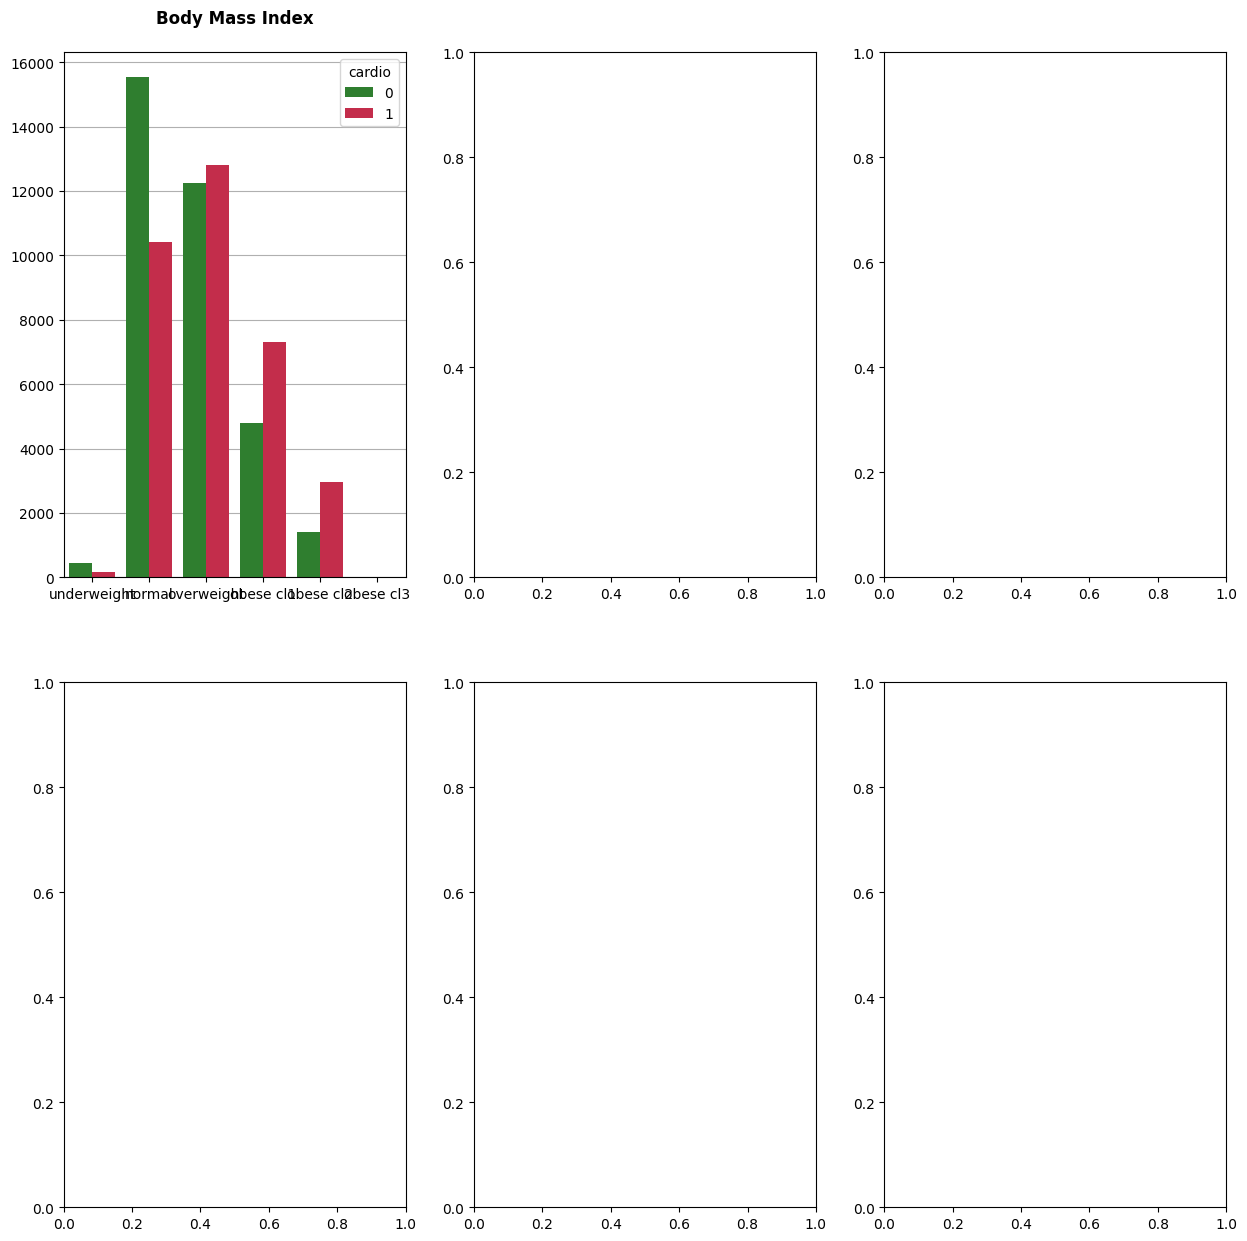

In [3]:
# RISK FACTORS
import matplotlib.pyplot as plt
import seaborn as sns

rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
chol_gluc_labels = ["normal", "above normal", "well above normal"]
binary_labels = ["no", "yes"]
cardio_palette = {0: "forestgreen", 1: "crimson"}
bmi_labels = ["underweight", "normal", "overweight", "obese cl1", "obese cl2", "obese cl3"]
bp_labels = ["hypotension", "normal", "elevated", "hypertension st1", "hypertension st2", "hypertension crisis"]

# The addition of "lambda ax:" was from Copilot by highlighting the code and prompting:
# "These plots won't show in the subplot and the pie plot is shown outside of the subplot."
plot_functions = [
    lambda ax: sns.countplot(data=df, x="bmi_cat", order=bmi_labels, hue="cardio", ax=ax, palette=cardio_palette, zorder=2),
    lambda ax: sns.countplot(data=df, x="ap_cat", order=bp_labels, hue="cardio", ax=ax, palette=cardio_palette, zorder=2),
    lambda ax: sns.countplot(data=df, x=(df["age"] // 365.25).astype(int), hue="cardio", ax=ax, palette=cardio_palette, zorder=2),
    lambda ax: sns.countplot(data=df, x="cholesterol", hue="cardio", ax=ax, palette=cardio_palette, zorder=2),
    lambda ax: sns.countplot(data=df, x="gluc", hue="cardio", ax=ax, palette=cardio_palette, zorder=2),
    lambda ax: sns.countplot(data=df, x="active", hue="cardio", ax=ax, palette=cardio_palette, zorder=2)
]
titles = [
    "Body Mass Index\n",
    "Blood Pressure\n",
    "Age\n",
    "Cholesterol Levels\n",
    "Glucose Levels\n",
    "Physically Active\n"
]
c = 0
for row in range(rows):
    for col in range(cols):
        if c < len(plot_functions):
            ax = axes[row, col]
            plot_functions[c](ax)  # Copilot (as mentioned above)
            if c == 3 or c == 4:
                ax.set_xticks([1, 2, 3])
                ax.set_xticklabels(labels=chol_gluc_labels)
            if c == 5:
                ax.set_xticks([0, 1])
                ax.set_xticklabels(labels=binary_labels)
            ax.set_title(titles[c], fontweight="bold")
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.grid(axis="y", zorder=1)
            c += 1
        else:
            fig.delaxes(axes[row, col])  # Remove unused subplot

fig.suptitle("\nExploratory Data Analysis\n", fontweight="bold", fontsize=20)
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()